<a href="https://colab.research.google.com/github/LIoccoUMD/supervised-learning/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the following dataset: https://drive.google.com/file/d/14jkgeXF1_0U446EWP1Ee8L8UoJM53TYg/view?usp=sharing

It contains:

*   id--a student's id
*   lat--student's home latittude
*   lon--student's home longitude
*   avg_hours_studided--how many hours this student studied every week on average this semester
*   parents_income--the student's parent's income in dollars.
*   major--the student's major
*   tutoring--whether or not the student received tutoring this semester
*   semester--what semester it is
*   credits--how many credits the student took this semester
*   student_age--how old the student is
*   student_year--what year of college the student is
*   year--what year it is

This data will be used to predict students' GPAs.



# Introduction
---

This dataset contains information about students that attend a university. My goal is to predict the students' GPAs. This is useful to see the expected performance of a student and to determine ahead of time whether they might underperform and need some assistance or be fine on their own. A difficulty of this task is the many factors that can go into one's GPA. I will have to select which columns to keep, remove, alter, etc. GPA can also be influenced by a plethora of other factors not in the dataset.

---



# Data Exploration

---

The university in question appears to have no transfer students, as inferred from the location data. The median length of attendance is five years, and it seems unlikely that the school offers one-credit classes. Grade inflation is a notable issue, with a large proportion of students achieving a 4.0 GPA. The university might be located in California, based on the available information. Tutoring has a statistically significant positive impact on student grades, as determined by a T-test. Students rarely switch majors, and the GPA distributions across different majors are quite similar.

---



# *Speculations*

---



Id will not be helpful as it does not provide any information that contributes to a student's performance.

Lat and lon columns will *not* be helpful either because their position does not affect their study habits.

GPA is very helpful as that is what we are trying to predict. This provides the best insight into a student's performance.

Avg_hours_studied will contribute greatly going forward as anyone would expect there to be a positive correlation between GPAs and average hours studied.

Parents_income will not be of much use going forward. While it can provide somne insight, the correlation is likely not strong and anyone can be a successful student, regardless of how much money their parents make.

Major will be very helpful going forward as it will allow us to compare gpas of students across different majors and within the same major.

Tutoring is good information to have because it should be suspected that a student who has received tutoring will have a higher gpa than those who have not.

Semester can be useful when looking at distriutions across a period of time but I do not think it will be *too* helpful in predicting student's GPAs.

Year is similar to semester, it might not be too helpful in predicting student's GPAs but when looking at the big picture, there is definitely information to observe across multiple years.

Credits is very important in predicting GPA. There is a relationship between GPA and workload so it will be interesting to see what that relationship is.

Student_age can be useful to see if GPA increases as students mature.

Student_year is useful to look at trends across a semester or couple of semesters.


---



In [ ]:
# importing packages packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# load dataset
data = pd.read_csv("my_data.csv")

# display first 10 rows
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data.csv'

In [ ]:
import scipy.stats as stats

# T-test for deciding whether or not tutoring makes a significant difference in GPA
# Make sure you are testing on full set, and not smaller set for optimization

# Extract gpa from students
received = data[data['tutoring'] == "Yes"]['gpa']
notReceived = data[data['tutoring'] == "No"]['gpa']

# t-test
t_statistic, p_value = stats.ttest_ind(received, notReceived)

# Check the p-value to determine statistical significance
alpha = 0.05  # significance level

if p_value < alpha:
    print("There is a significant difference in GPAs between students who received tutoring and student who did not.")
else:
    print("There is no significant difference in GPAs between students who received tutoring and students who did not.")



There is a significant difference in GPAs between students who received tutoring and student who did not.


Column: id
Min: 13251
Max: 13260



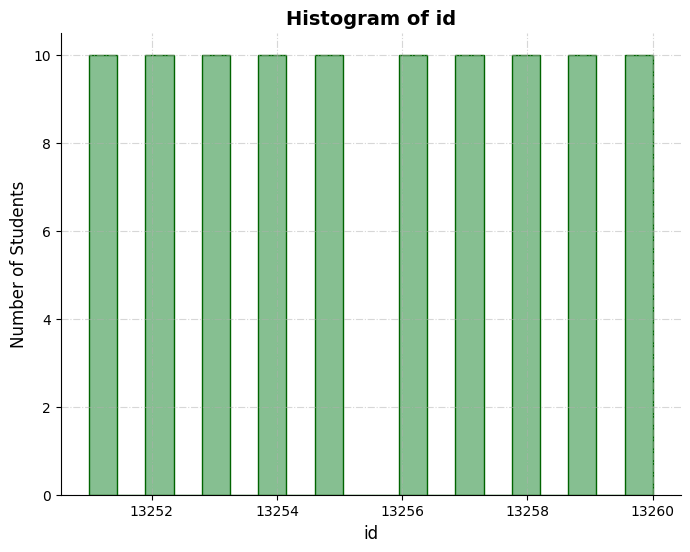


Column: avg_hours_studied
Min: 0
Max: 6



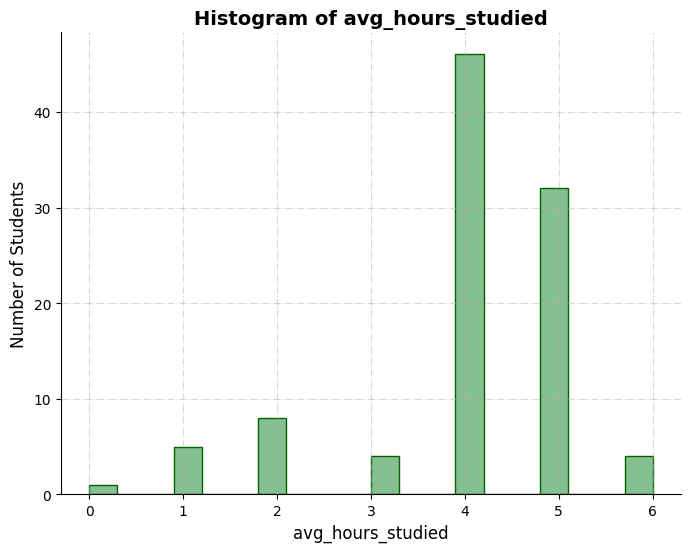


Column: parents_income
Min: 57884.26824029877
Max: 154662.43974180598



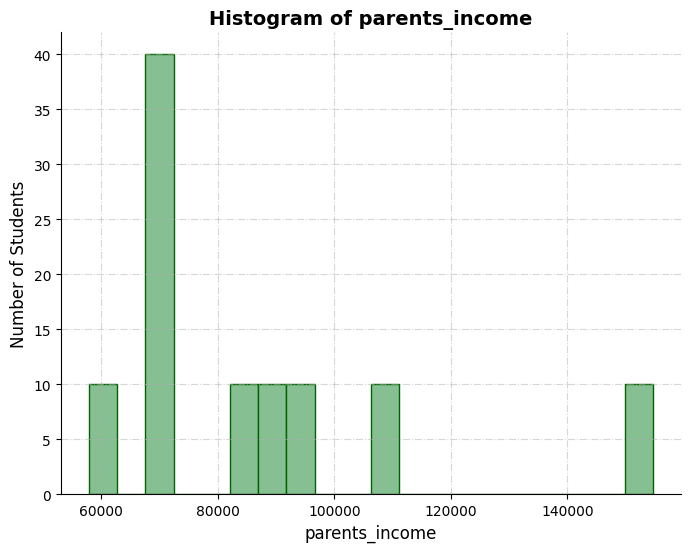


Column: major
Min: CS
Max: Physics



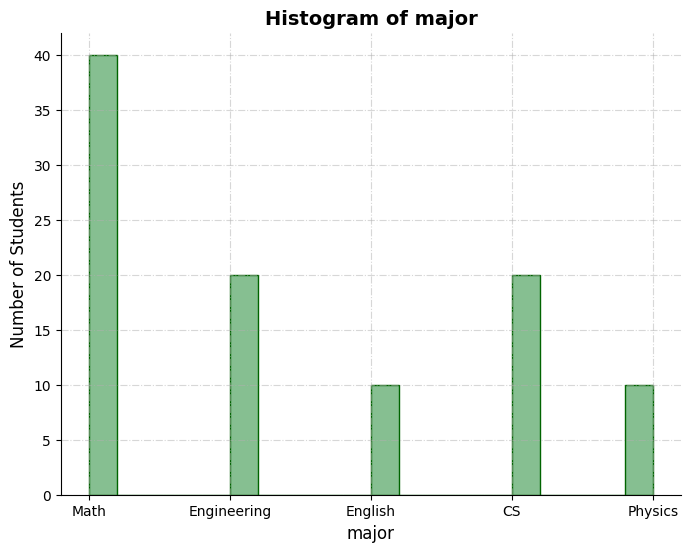


Column: semester
Min: Fall
Max: Spring



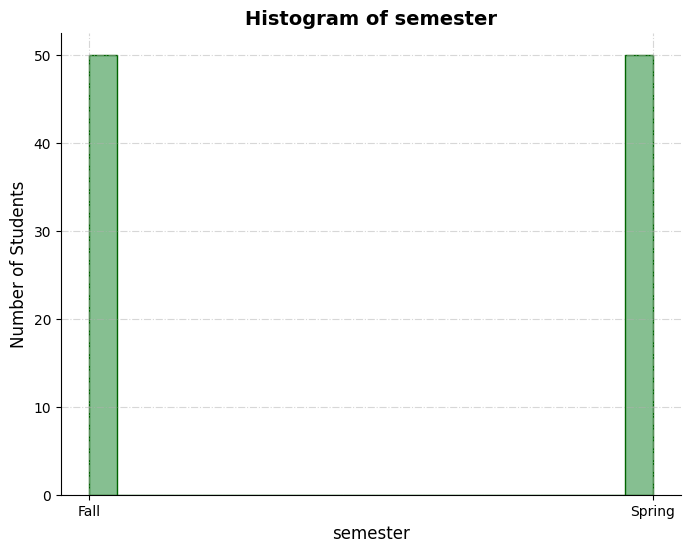


Column: credits
Min: 9
Max: 18



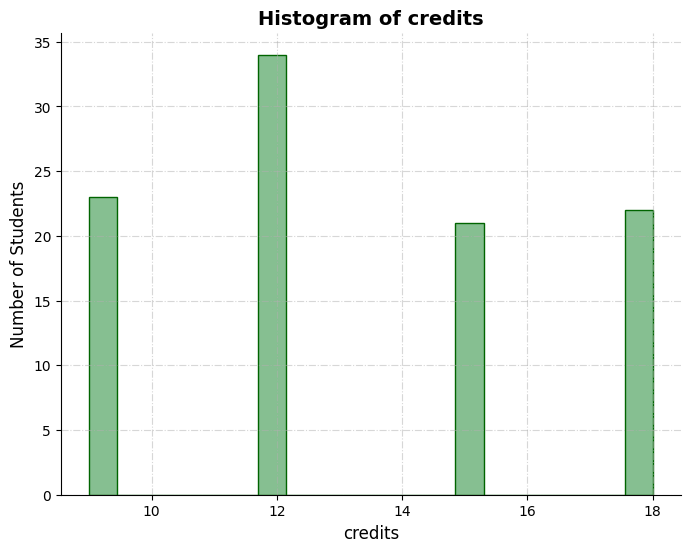


Column: tutoring
Min: 0.0
Max: 1.0



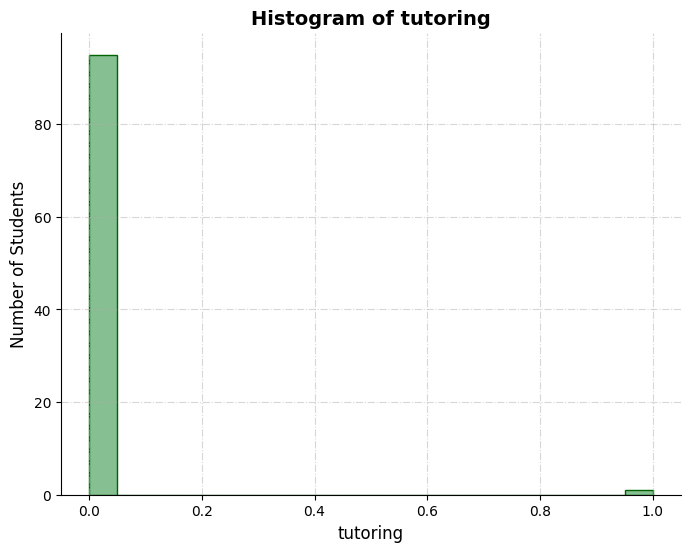


Column: student_age
Min: 17
Max: 31



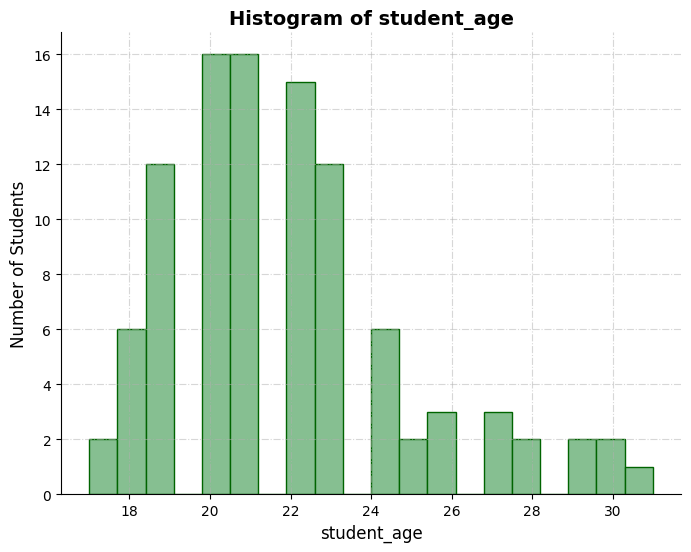


Column: student_year
Min: Freshman
Max: Sophmore



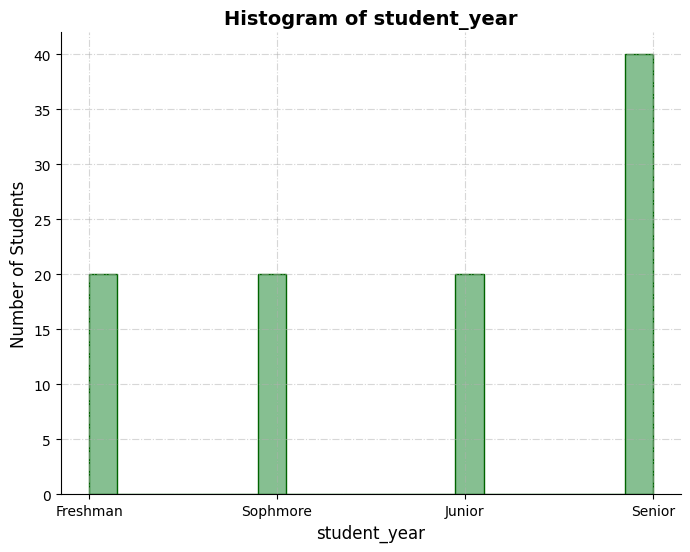


Column: year
Min: 2006
Max: 2025



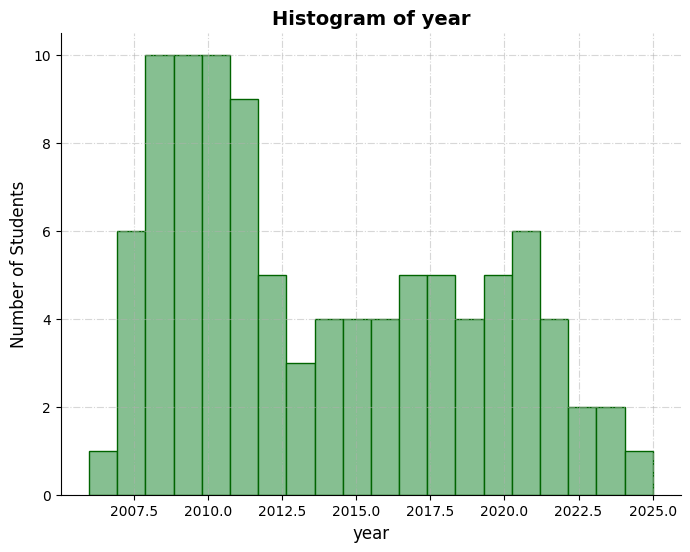


Column: gpa
Min: 2.63
Max: 4.0



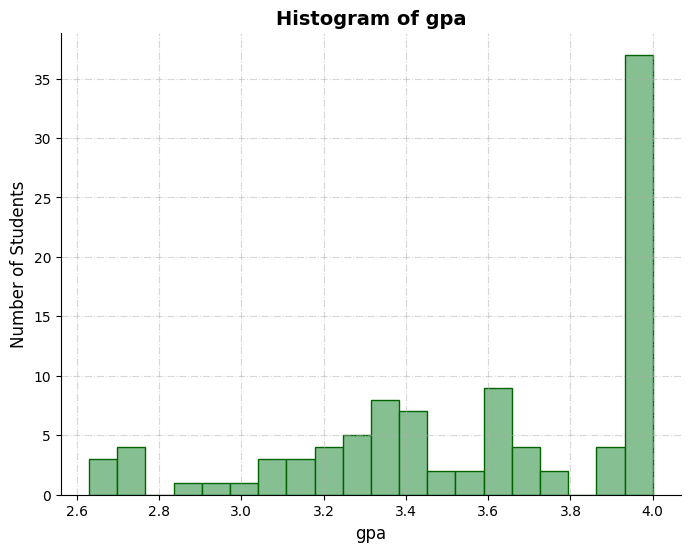

In [ ]:
# OHE the tutoring column values [using the map function] to be numerical data by having 0 represent 'No' and 1 represent 'Yes'
data["tutoring"] = data["tutoring"].map({"Yes": 1, "No": 0})
# normally the above statement would go in the data cleaning section but this way
# I can plot a histogram and keep the column in the dataset

# store columns so we can loop through them
columns = ['id', 'avg_hours_studied', 'parents_income', 'major', 'semester', 'credits', 'tutoring', 'student_age', 'student_year', 'year', 'gpa']

for column in columns:
  print ("Column:",column)
  print ("Min:",data[column].min())
  print ("Max:",data[column].max())
  print () # new line between each column

  # Create a new figure and axis for each histogram
  figure, axis = plt.subplots(figsize=(8, 6))

  # Plot histogram for current column
  axis.hist(data[column], bins=20, color='#86bf91', edgecolor='darkgreen')

  # Set labels and title for histogram
  axis.set_xlabel(column, fontsize=12) # x label
  axis.set_ylabel('Number of Students', fontsize=12) # y label
  axis.set_title(f'Histogram of {column}', fontsize=14, fontweight='bold') #title to column name

  # Add a grid to the plot
  axis.grid(True, linestyle='-.', alpha=0.5)

  # Remove the top and right spines
  axis.spines['top'].set_visible(False)
  axis.spines['right'].set_visible(False)

  # Customize tick labels
  axis.tick_params(axis='both', which='both', labelsize=10)

  # Display the histogram
  plt.show()
  print()

# Data Cleaning
---

In [ ]:
# drop the unnamed, lat, and lon columns as they are unnecessary
data = data.drop(columns=['Unnamed: 0','lat','lon'], axis=1)

# remove NaN
data = data.dropna(axis=0)

# OHE major, semester, and student_year so that the data is numerical and not categorical
columnsToEncode = ['major','semester','student_year']
encodedColumns = pd.get_dummies(data[columnsToEncode])

# Merge one-hot encoded columns and unaltered columns from original dataframe
encodedColumns = pd.concat([data.drop(columns=['major','semester','student_year']), encodedColumns], axis=1)

# Important note: major, semester, and student year have increased dimensionality of the dataframe

I will drop the 'lat' and 'lon' columns as they do not have an impact (or at least not a significant enough impact) to factor in to predicted GPA's. The 'tutoring' column will be binary classified through one-hot encoding where 1 will represent 'Yes' and 0 will represent 'No'. I will drop any rows with NaN values that are used in my calculation. Only the tutoring column has NaN values and it only has 10 so I will drop those without having a large impact on the accuracy. The 'major', 'semester', and 'student_year' columns need to contain numerical data, so those will get OHE as well using the get_dummies function. Then the new columns will get concatenated onto the original dataframe so that there is one dataframe with all of the data in the correct form for it to be passed into an algorithm.

---

# Evaluation
---
I will evaluate my model by calculating the Mean Squared Error (MSE). This will tell me a lot about my models. Larger errors will be punished heavier than smaller errors which is helpful when predicting GPA. The tricky part will be dealing with outliers. If the model is way off there should be a large penalty but if it is only 0.1 or 0.2 points off then it can be written off as a success. It will be apparent by the MSE if there are outliers and I will deal with them on a case-by-case basis but I will likely remove them. If I think the data point is important to keep, I will replace it with the average of the column.




# Modeling
---

 The first model I am going to use is *Linear Regression*. There are no hyperparameters with standard linear regression, however there are variants that have hyperparameters. I will be using standard linear regression. If I were to use a variant of linear regression, let's say ridge regression, I would tune the alpha parameter which is the learning rate. Making alpha larger would increase the penalty, so a good value for this *might* be 10.

I am also going to use *random forest* which has a hyperparameter 'n_estimators'. This is the number of decision trees in the forest. I picked 100 because going much higher does not increase performance and takes too much processing power and going lower decreases performance.

The third model I am using is *K-Nearest Neighbor*. The clusters represent the different grade point averages, i.e. 1.0, 2.0, 3.0, etc. I tried with 8 clusters to account for 1.5, 2.5, etc. but that was too many. When using KNN it is good to have a small amount of clusters in comparison to the size of the dataset.

---



In [ ]:
# LinearRegression
X = encodedColumns.drop(columns=['id','gpa']) # features -- preprocessing is what allows us to just set this to data
y = data['gpa'] # target variable i.e. what is being predicted

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create Linear Regression object
regressionModel = LinearRegression()

# Train the model
regressionModel.fit(X_train, y_train)
regressionModel_predictions = regressionModel.predict(X_test)
rM_mse = mean_squared_error(y_test, regressionModel_predictions)

# evaluating linear regression
print("Linear Regression:")
print("MeanSquaredError [MSE]:", rM_mse)
print() # new line

#=============================================================================#

# Random Forest
randomForest = RandomForestRegressor(n_estimators=100, random_state=10)
randomForest.fit(X_train, y_train)
rf_predictions = randomForest.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression:")
print("MeanSquaredError [MSE]:", rf_mse)
print() # new line

#=============================================================================#

# K-Nearest Neighbor (KNN)

# Create a KNN regressor
knnRegressor = KNeighborsRegressor(n_neighbors=4)  # n_neighbors = k, the number of clusters

# Train the model
knnRegressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knnRegressor.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, y_pred)
print("K-Nearest Neighbor")
print("MeanSquaredError [MSE]:", knn_mse)

Linear Regression:
MeanSquaredError [MSE]: 0.04217058847886044

Random Forest Regression:
MeanSquaredError [MSE]: 0.022560016999999898

K-Nearest Neighbor
MeanSquaredError [MSE]: 0.032395937499999986


# Conclusion
---


The goal of this project was to predict student GPAs, given the provided dataset. The first step was to preprocess the data so that it could be passed into ML algorithms. I one-hot encoded some of the columns and removed a small amount of invalid data. Once all of the data was numerical, I was able to split it into training and test sets and pass it into some algorithms.**

At first glance the models did not feel successful, but given this is a fabricated data set, linear regression actually seems like it did quite well. This makes sense because GPA is correlated with many of the columns in the dataset so linear regression performed well. Some additional data that might help is whether or not a student participates in extracurricular activities or clubs, or maybe data across mutliple semesters would prove more helpful to identify trends.

---

